# First test

Single word test (apple)

fs = 8000[Hz/s]
number of samples = 2694
length(duration) = 0.33675s


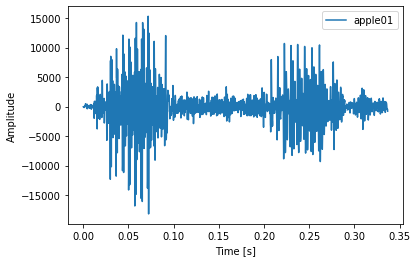

[ -26  -56  -22 ... -475 -455 -775] <class 'numpy.ndarray'> (2694,)


In [4]:
import numpy as np
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal

path = "data_store/apple/apple01.wav"

#####################
#   Time domain
#####################
fs, x = wavfile.read(path)
print(f"fs = {fs}[Hz/s]"); 
print(f"number of samples = {x.shape[0]}")
length = x.shape[0] / fs # duration
print(f"length(duration) = {length}s")
time = np.linspace(0., length, x.shape[0])
plt.plot(time, x, label="apple01")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
print(x, type(x), x.shape)# señal

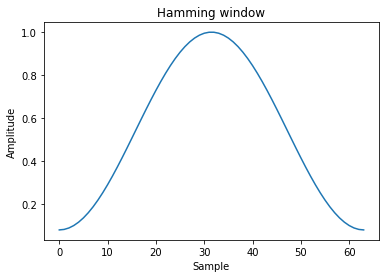

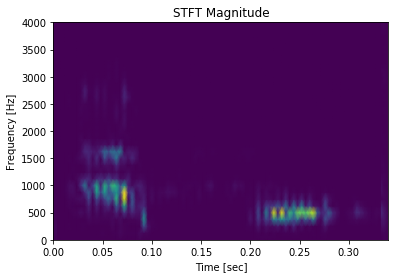

(33,) (83,)
(33, 83)


In [5]:
#####################
#   window
#####################
hamming = signal.windows.hamming(64)
plt.plot(hamming)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()
#print(hamming, type(hamming), hamming.shape)# window

#####################
#   Frequency domain 
#####################
f, t, Zxx = signal.stft(x, fs= fs, window= hamming, nperseg=64, noverlap=32 )# Defaults to a Hann window.
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.show()

#####################
#   Spectogram
#####################
f, t, Sxx = signal.spectrogram(x, fs= fs, window= hamming, nperseg=64, noverlap=32)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(f.shape, t.shape)
print(Sxx.shape)

(20, 83)


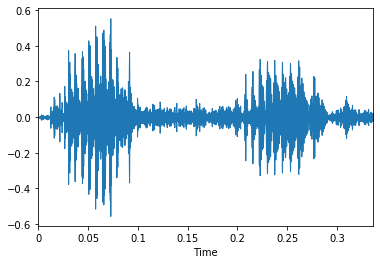

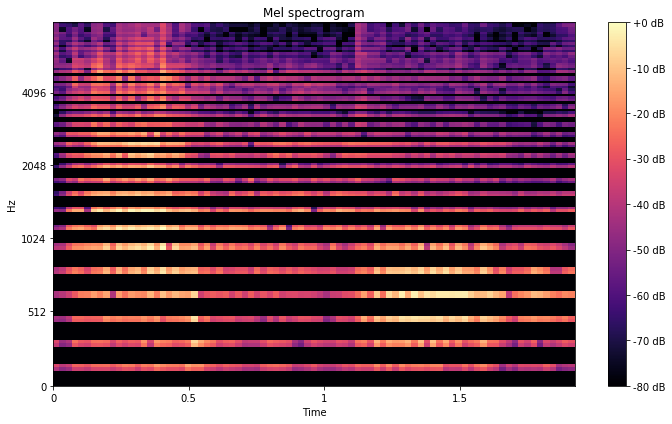

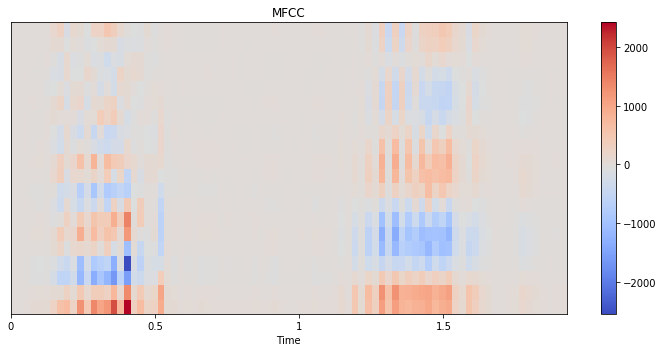

In [10]:
#####################
#   MFCC
#####################
import librosa 
import librosa.display
import matplotlib.pyplot as plt

fs = 8000
x, fs = librosa.load('data_store/apple/apple01.wav', fs)
librosa.display.waveplot(x, sr=fs)

mel_spectrogram = librosa.feature.melspectrogram(x, sr=fs, S=Sxx) 

plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

mfcc = librosa.feature.mfcc(x, sr=fs, S=mel_spectrogram, n_mfcc=20)
print(mfcc.shape)
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()